In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset 

file_path = "./Dataset of Diabetes .csv"
df = pd.read_csv(file_path)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# Dataset Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


* Non-Numerical datatype fields -> ["Gender","CLASS"]
* There isn't any null values in the dataset. 

#### Categorical Data Exploration and Analysis

In [4]:
df.describe(exclude='number')

,Gender,CLASS
count,1000,1000
unique,3,5
top,M,Y
freq,565,840


* Here , Gender have 3 unique Values where it should be 2 i.e M of F as explained in problem statement.
* Class Also have 5 unique values where it should be 3.    

In [5]:
df.Gender.value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

* There is a typo error for female data.

In [6]:
df[df["Gender"] == 'f']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
991,195,4543,f,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y


* Here f is additional values with 'f' which should be F.

In [7]:
# Replace the lowercase 'f' with uppercase 'F' in the 'Gender' column
 
df.replace({"Gender": {"f": "F"}}, inplace=True)

In [8]:
df.iloc[991].Gender  # Verify the replacement

'F'

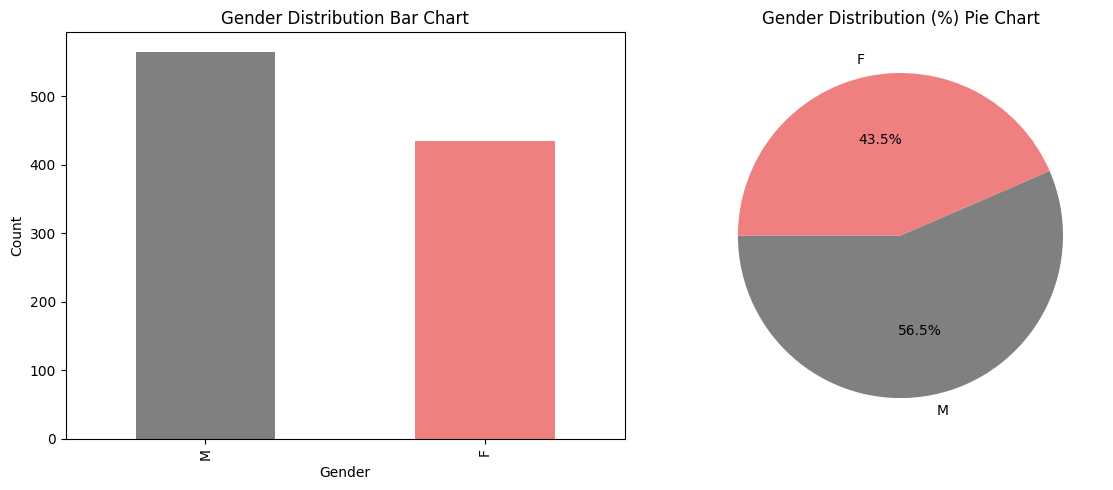

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
df['Gender'].value_counts().plot(kind='bar', color=['grey', 'lightcoral'], ax=ax[0])
ax[0].set_title("Gender Distribution Bar Chart")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Count")

# Pie plot
df["Gender"].value_counts().plot(kind='pie', colors=['grey', 'lightcoral'], autopct='%1.1f%%', startangle=180, ax=ax[1])
ax[1].set_title("Gender Distribution (%) Pie Chart")
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [10]:
df["CLASS"].value_counts() # Count occurrences of each class label

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [11]:
df["CLASS"].unique() # Unique class labels, since in above result we can't see the difference.

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

* Typo error , additional space which makes extra classes

In [12]:
df.replace({"CLASS": {"N ": "N", "Y ": "Y"}}, inplace=True) # Clean CLASS column by removing trailing spaces

In [13]:
df["CLASS"].value_counts() # Verify the cleaning of CLASS column

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

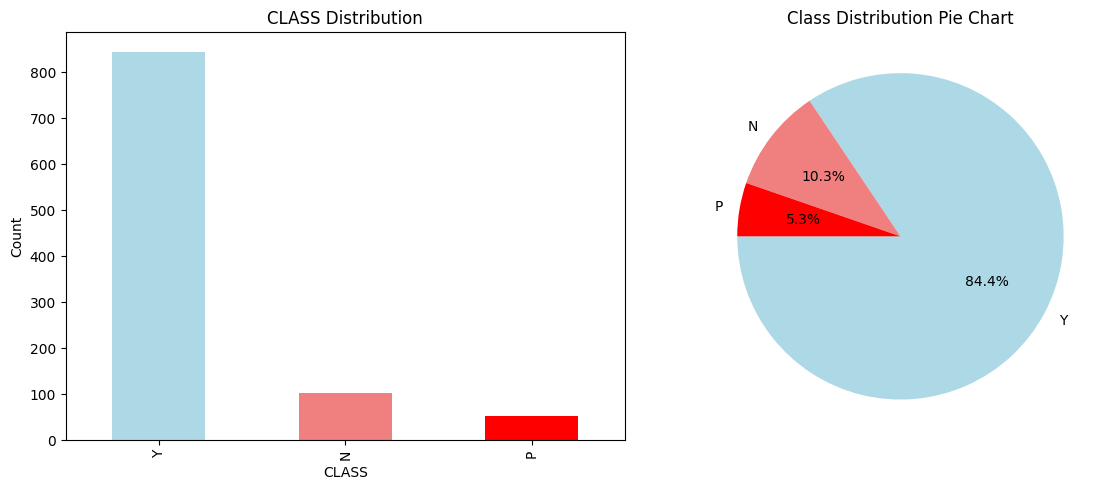

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
df['CLASS'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral', 'red'], ax=ax[0])
ax[0].set_title("CLASS Distribution")
ax[0].set_xlabel("CLASS")
ax[0].set_ylabel("Count")

# Pie plot
df["CLASS"].value_counts().plot(kind='pie', colors=['lightblue', 'lightcoral','red'], autopct='%1.1f%%', startangle=180, ax=ax[1])
ax[1].set_title("Class Distribution Pie Chart")
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()


* The Classes of the target feature is imbalanced.

### ID and No_Pation columns analysis

In [15]:
df["No_Pation"].min(), df["No_Pation"].max()  # Minimum and maximum patient numbers

(np.int64(123), np.int64(75435657))

In [16]:
df["No_Pation"].nunique()  # Unique patient numbers

961

In [17]:
df["No_Pation"].duplicated().sum()  # Check for duplicate entries in No_Pation column

np.int64(39)

In [18]:
df.ID.duplicated().sum()  # Check for duplicate entries in ID column

np.int64(200)

In [19]:
df["ID"].is_unique

False

In [20]:
df["ID"].describe()

count    1000.000000
mean      340.500000
std       240.397673
min         1.000000
25%       125.750000
50%       300.500000
75%       550.250000
max       800.000000
Name: ID, dtype: float64

In [21]:
df["ID"].nunique()

800

* From the above analysis, ID and No_Pation seems irrelevent. So, drop the columns

In [22]:
df = df.drop(columns=["ID", "No_Pation"])  # Drop ID and No_Pation column as it is not useful for analysis
df.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

## Numeric Column Analysis

In [23]:
# numeric columns analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

In [24]:
numeric_df = df[numeric_cols]


In [25]:
numeric_df.sample(5)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
667,61,2.5,45,11.6,9.7,13.8,1.0,3.1,6.3,33.0
26,30,4.8,80,5.5,5.5,1.8,1.2,3.5,0.8,19.0
187,40,5.9,76,4.0,5.0,2.1,1.6,3.0,0.9,24.0
833,51,5.2,63,11.0,6.7,2.1,1.8,1.3,1.0,33.0
381,57,5.3,66,7.9,3.7,2.9,1.1,5.5,1.3,36.0


In [26]:
len(numeric_cols)

10

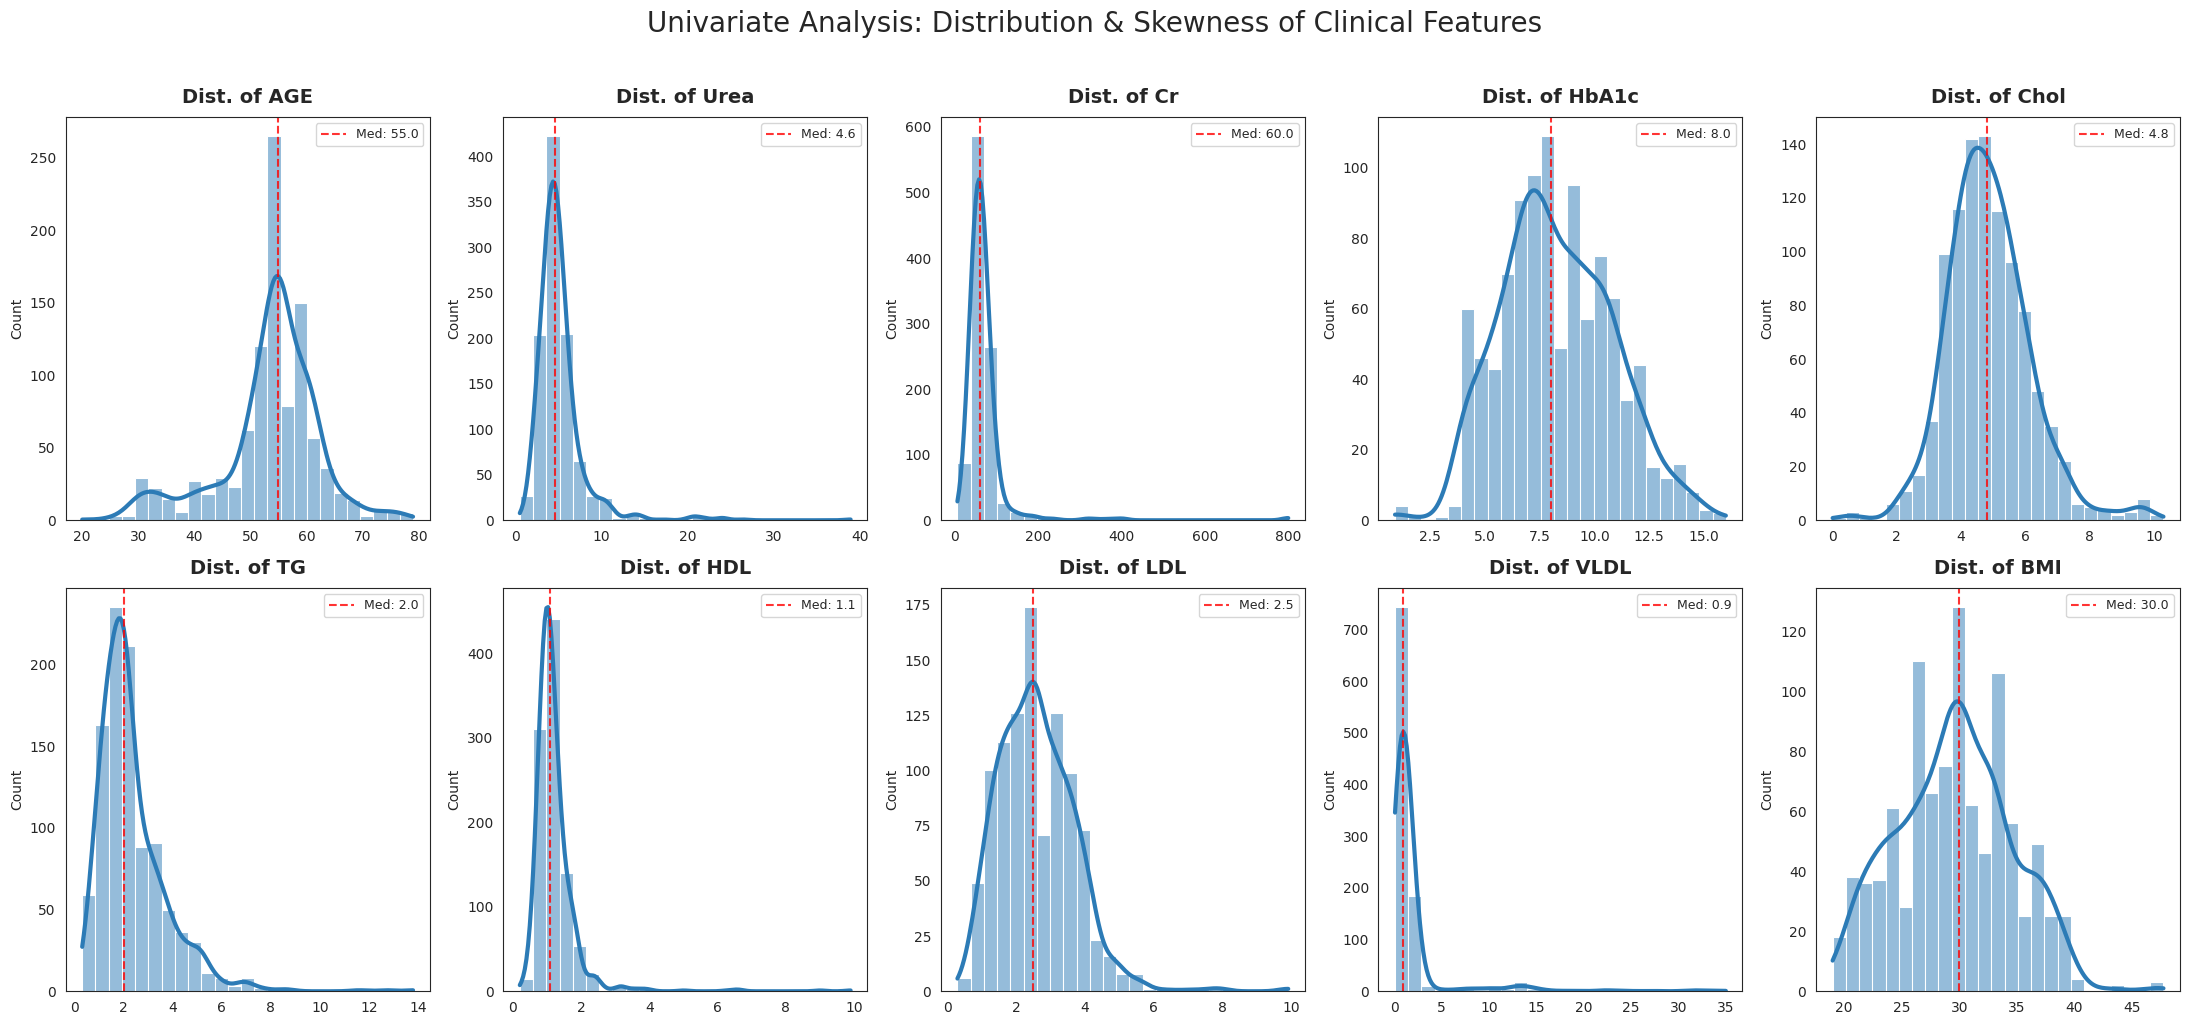

In [27]:
sns.set_style("white")

fig, axes = plt.subplots(2, 5, figsize=(22, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    # 1. Use a more informative color and slightly higher transparency
    sns.histplot(numeric_df[column], kde=True, color='#2c7bb6', bins=25, 
                 ax=axes[i], line_kws={'lw': 3})
    
    # 2. Add a vertical line for the median - crucial for clinical data
    median_val = numeric_df[column].median()
    axes[i].axvline(median_val, color='red', linestyle='--', alpha=0.8, label=f'Med: {median_val:.1f}')
    
    # 3. Clean up titles and labels
    axes[i].set_title(f"Dist. of {column}", fontsize=14, fontweight='bold', pad=10)
    axes[i].set_xlabel("") # Remove x-label to reduce clutter
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].legend(fontsize=9)

# 4. Global adjustments
plt.suptitle("Univariate Analysis: Distribution & Skewness of Clinical Features", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Outlier Analysis

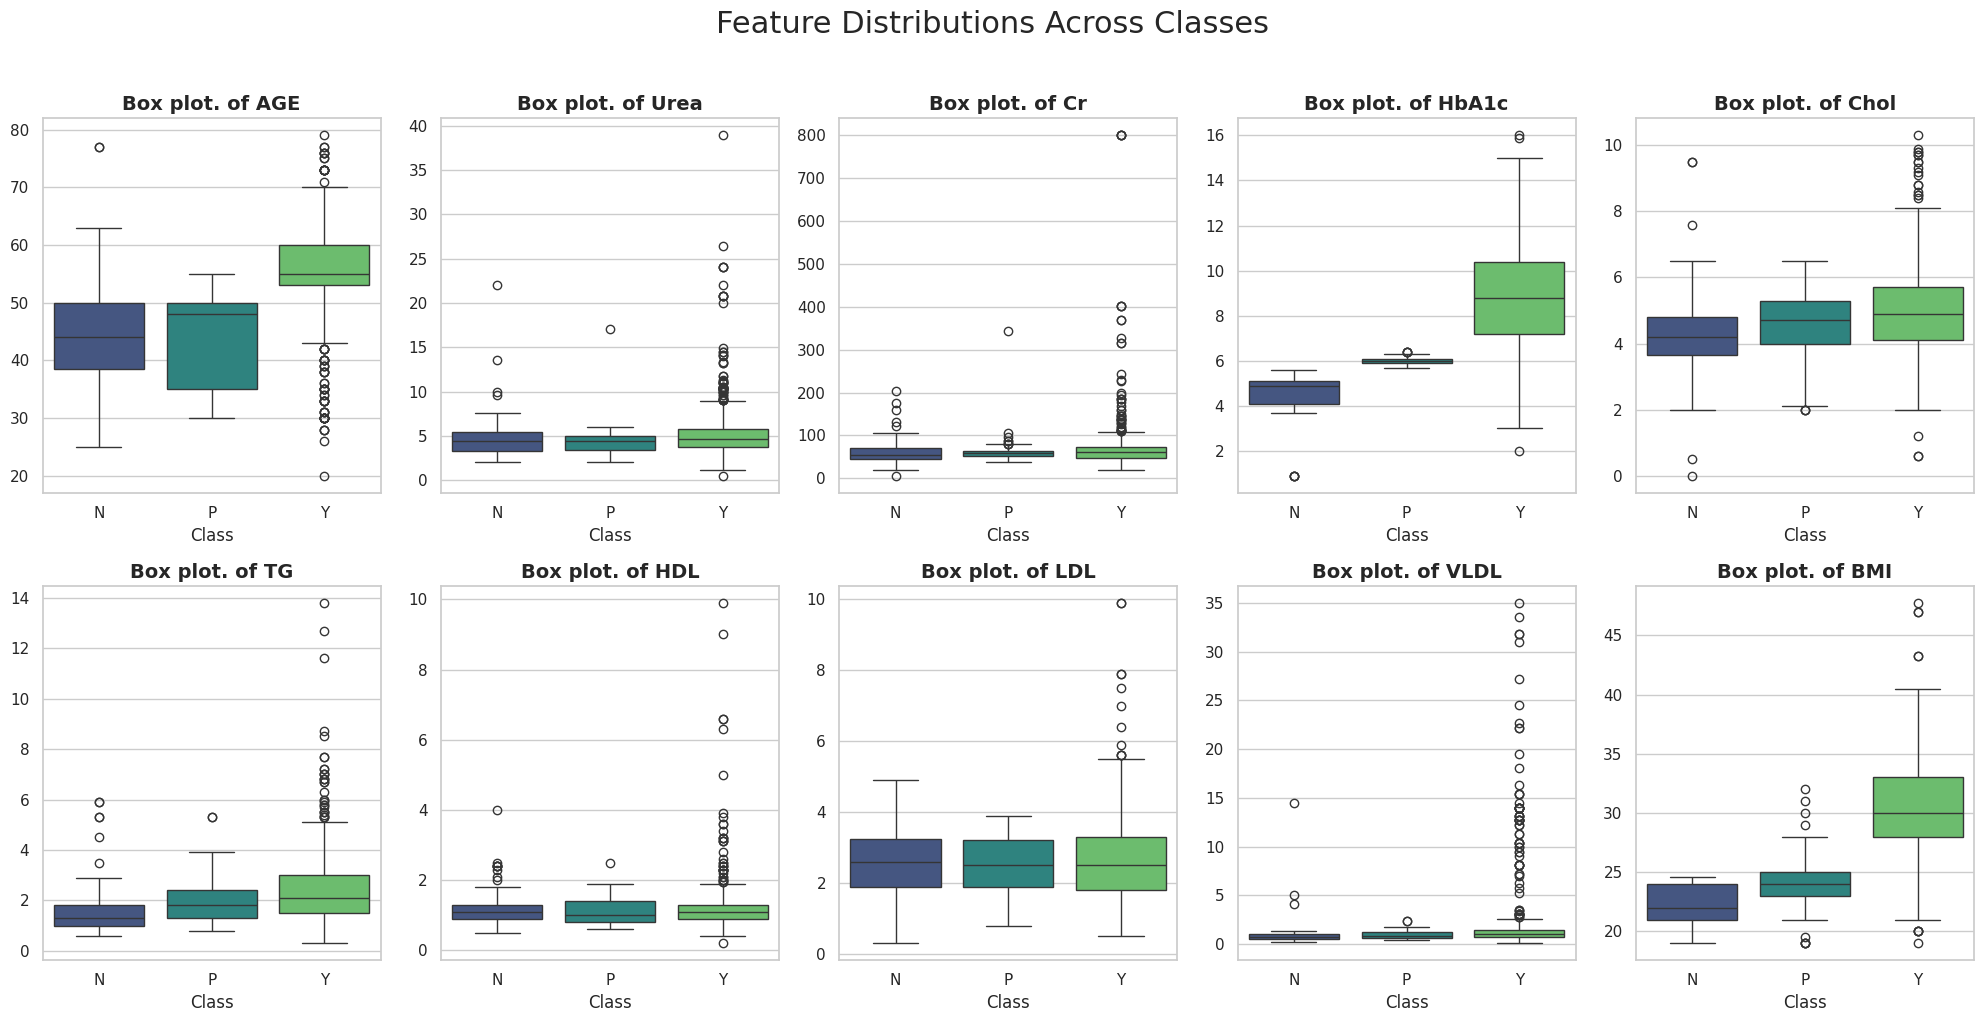

In [28]:
# List of numeric columns
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a grid of subplots (2 rows, 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Plotting each feature against the CLASS to see separation
    sns.boxplot(data=df, x='CLASS', y=col, ax=axes[i], palette='viridis', hue='CLASS')
    
    # Customizing labels
    axes[i].set_title(f'Box plot. of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('')
    
    # Remove redundant legends for each subplot
    if axes[i].get_legend():
        axes[i].get_legend().remove()

# Global title and layout adjustment
plt.suptitle('Feature Distributions Across Classes', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

* Here, we can analyze the data outliers in statistical on the basis of five number summary(Min, q1, median, q3 and Max)
* lower fence = q1 - 1.5*IQR where,IQR = q3-q1
* Upper fence = q3 + 1.5*IQR

### Analysis for the provided data description.

In [29]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1000.0,53.528000,8.799241,20.0,51.0,55.0,59.0,79.00
Urea,1000.0,5.124743,2.935165,0.5,3.7,4.6,5.7,38.90
Cr,1000.0,68.943000,59.984747,6.0,48.0,60.0,73.0,800.00
HbA1c,1000.0,8.281160,2.534003,0.9,6.5,8.0,10.2,16.00
Chol,1000.0,4.862820,1.301738,0.0,4.0,4.8,5.6,10.30
TG,1000.0,2.349610,1.401176,0.3,1.5,2.0,2.9,13.80
HDL,1000.0,1.204750,0.660414,0.2,0.9,1.1,1.3,9.90
LDL,1000.0,2.609790,1.115102,0.3,1.8,2.5,3.3,9.90
VLDL,1000.0,1.854700,3.663599,0.1,0.7,0.9,1.5,35.00
BMI,1000.0,29.578020,4.962388,19.0,26.0,30.0,33.0,47.75


* Age are in range of 20-79, as in problem sheet.
* Chol are in range of 0 to 10,  which is below 200(desirable).
* TG are in range of 0.3 to 13.80, which is below 150(Normal).
* HDL are in range of 0.2 to 9.90, which is less than the optimal, for optimal it should be > 40 for men and > 50 for women.
* LDL is in range of 0.3 to 9.90 which should be < 100. so the LDL is optimal for all.
* VLDL is in range of 0.1 to 35, which should be in range of 2-30(Normal)
* BMI is in range of 19 to 47.75

### Urea Analysis

In [30]:
print(f"Percentage of Patients having urea more than 20 = {(numeric_df["Urea"].values > 20).sum()/1000 * 100}%") # percentage of patients having urea greater than 20

Percentage of Patients having urea more than 20 = 1.0999999999999999%


In [31]:
print(f"Percentage of patients having Urea less than 7 = {(numeric_df["Urea"].values < 7).sum()/1000 * 100}%") # percentage of patients having urea less than 7

Percentage of patients having Urea less than 7 = 87.2%


In [32]:
((numeric_df["Urea"].values >= 7) & (numeric_df["Urea"].values <= 20)).sum()/1000 * 100  # percentage of patients having urea between 7 and 20

np.float64(11.700000000000001)

In [33]:
def calculate_percentage_in_range(series, lower_bound, upper_bound):
    count_in_range = ((series.values >= lower_bound) & (series.values <= upper_bound)).sum()
    percentage = (count_in_range / len(series)) * 100
    return percentage

calculate_percentage_in_range(numeric_df["Urea"], 7, 20)

np.float64(11.700000000000001)

### Creatinine Analysis

In [34]:
(numeric_df["Cr"].values > 1.3).sum()/1000 * 100 # percentage of patients having Cr less than 0.6

np.float64(100.0)

In [35]:
calculate_percentage_in_range(numeric_df["Cr"], 0.6, 1.3)

np.float64(0.0)

* None of the patients founds normal in case of Creatinine. The minimum creatinine is 6.0 which is greater than the normal human. That means everyone has high creatinine. Or may be it is in different Scale.

### VLDL 

In [36]:
calculate_percentage_in_range(numeric_df["VLDL"],2,30)

np.float64(12.3)

In [37]:
(numeric_df["VLDL"] < 2).sum()/1000 *100

np.float64(87.2)

In [38]:
(numeric_df["VLDL"] > 30).sum()/1000*100

np.float64(0.5)

### BMI

In [39]:
(numeric_df["BMI"] < 25).sum()/1000*100 # Percentage of Normal BMI

np.float64(19.0)

In [40]:
numeric_df["BMI"].between(25,29.9).mean()*100 # Percentage of Over weight

np.float64(28.4)

In [41]:
numeric_df["BMI"].ge(30).sum()/1000*100 # percentage of obesity

np.float64(52.6)

### HbA1c Analysis

% Normal: < 5.7%, 
Prediabetes: 5.7-6.4%,
Diabetes: >= 6.5%

Key diagnostic test 
for diabetes 


In [42]:
numeric_df["HbA1c"].describe()

count    1000.000000
mean        8.281160
std         2.534003
min         0.900000
25%         6.500000
50%         8.000000
75%        10.200000
max        16.000000
Name: HbA1c, dtype: float64

In [43]:
(numeric_df["HbA1c"] < 5.7).values.sum()/1000 * 100  # percentage of patients having HbA1c less than 5.7

np.float64(14.899999999999999)

In [44]:
(numeric_df["HbA1c"].between(5.7, 6.4).sum() / len(numeric_df)) * 100 # percentage of patients having HbA1c between 5.7 and 6.4

np.float64(9.0)

In [45]:
(numeric_df["HbA1c"].ge(6.5).sum() / len(numeric_df)) * 100 # percentage of patients having HbA1c greater than or equal to 6.5

np.float64(76.1)

## Cholestrol Analysis

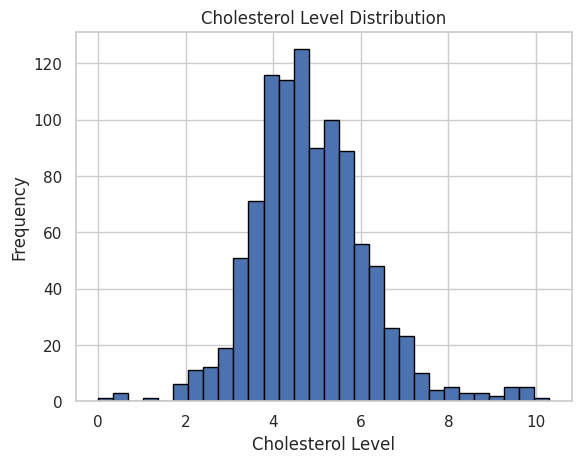

In [46]:
numeric_df["Chol"].hist(bins=30, edgecolor='black')
plt.title("Cholesterol Level Distribution")
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.show()

### Multivariate Analysis

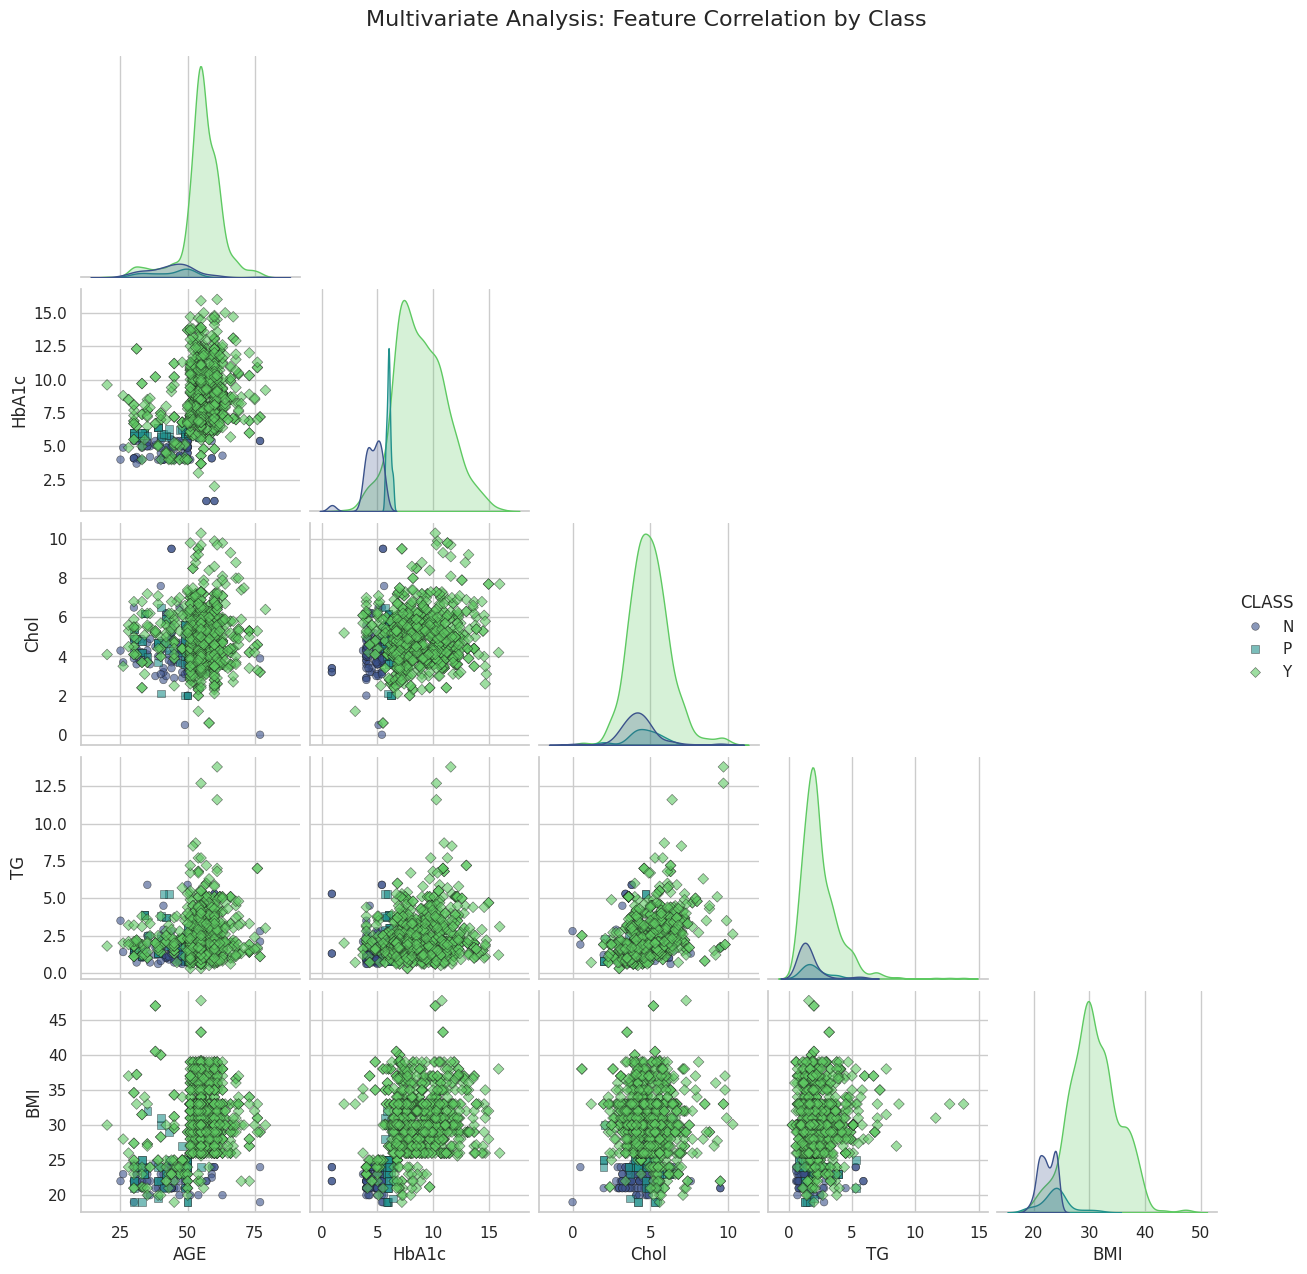

In [47]:
pair_plot = sns.pairplot(
    df, 
    hue="CLASS", 
    vars=['AGE', 'HbA1c', 'Chol', 'TG', 'BMI'], # Suggested: Select top 5 features
    diag_kind='kde', 
    palette='viridis',
    markers=['o', 's', 'D'], # Different shapes for different classes
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
    height=2.5,
    corner=True
)

pair_plot.figure.suptitle("Multivariate Analysis: Feature Correlation by Class", y=1.02, fontsize=16)
plt.show()

In [48]:
numeric_df.corr() # For Numerical Features

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000


In [49]:
df2 = df["CLASS"].copy().to_frame()
df2.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["CLASS_Encoded"] = le.fit_transform(df2["CLASS"])
df2["Gender_encoded"] = le.fit_transform(df["Gender"])

In [51]:
df2.CLASS_Encoded.corr(numeric_df["BMI"])

np.float64(0.5698785123349915)

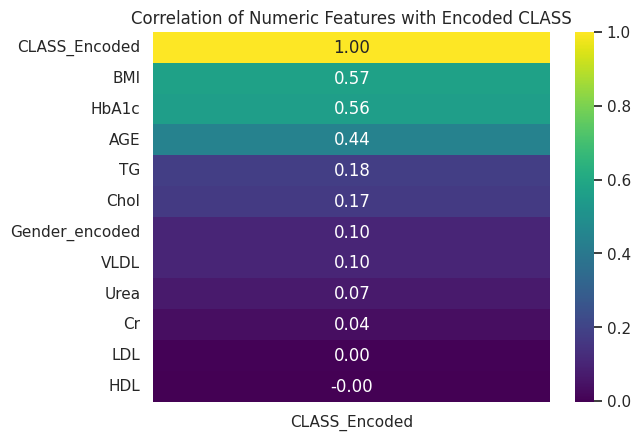

In [52]:
corr_df = numeric_df.copy()
corr_df["CLASS_Encoded"] = df2["CLASS_Encoded"]
corr_df["Gender_encoded"] = df2["Gender_encoded"]

corr_matrix = corr_df.corr()

sns.heatmap(
    corr_matrix[["CLASS_Encoded"]].sort_values(by="CLASS_Encoded", ascending=False),
    annot=True,
    fmt=".2f",
    cmap="viridis"
)

plt.title("Correlation of Numeric Features with Encoded CLASS")
plt.show()


In [53]:
corr_matrix # Multivariate Analysis

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS_Encoded,Gender_encoded
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.443009,0.021486
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.067010,0.116311
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.037500,0.154870
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.555321,-0.009362
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.167375,-0.064763
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.182299,0.052111
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.001248,-0.130130
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.004247,0.054563
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.101247,0.194120
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000,0.569879,0.072097


In [54]:
df2["Gender_encoded"].value_counts()

Gender_encoded
1    565
0    435
Name: count, dtype: int64

In [55]:
df2["Gender_encoded"].corr(df2["CLASS_Encoded"])

np.float64(0.10339669918221345)

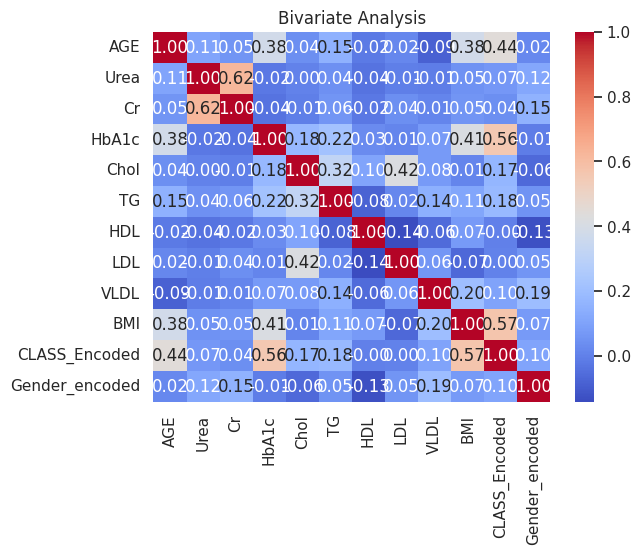

In [56]:
sns.heatmap(
    corr_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Bivariate Analysis")
plt.show()

In [57]:
corr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1000.0,53.528000,8.799241,20.0,51.0,55.0,59.0,79.00
Urea,1000.0,5.124743,2.935165,0.5,3.7,4.6,5.7,38.90
Cr,1000.0,68.943000,59.984747,6.0,48.0,60.0,73.0,800.00
HbA1c,1000.0,8.281160,2.534003,0.9,6.5,8.0,10.2,16.00
Chol,1000.0,4.862820,1.301738,0.0,4.0,4.8,5.6,10.30
TG,1000.0,2.349610,1.401176,0.3,1.5,2.0,2.9,13.80
HDL,1000.0,1.204750,0.660414,0.2,0.9,1.1,1.3,9.90
LDL,1000.0,2.609790,1.115102,0.3,1.8,2.5,3.3,9.90
VLDL,1000.0,1.854700,3.663599,0.1,0.7,0.9,1.5,35.00
BMI,1000.0,29.578020,4.962388,19.0,26.0,30.0,33.0,47.75


### Preprocessing 

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(corr_df)
scaled_df = pd.DataFrame(scaled_features, columns=corr_df.columns)

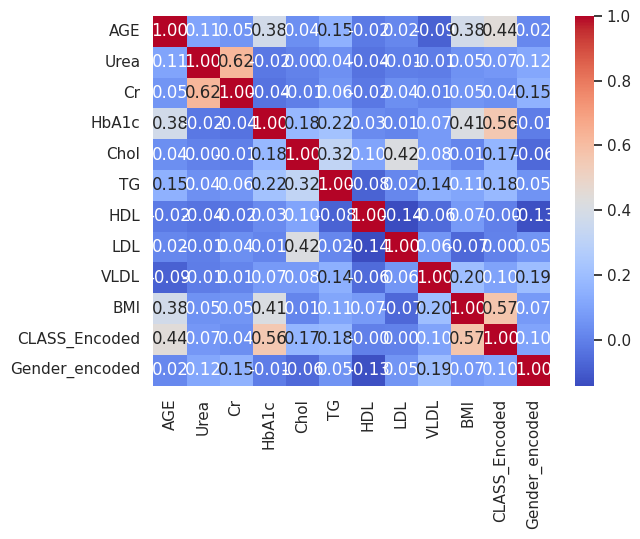

In [59]:
sns.heatmap(
    scaled_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.show()

In [60]:
scaled_df.corr()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS_Encoded,Gender_encoded
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.443009,0.021486
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.067010,0.116311
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.037500,0.154870
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.555321,-0.009362
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.167375,-0.064763
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.182299,0.052111
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.001248,-0.130130
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.004247,0.054563
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.101247,0.194120
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000,0.569879,0.072097


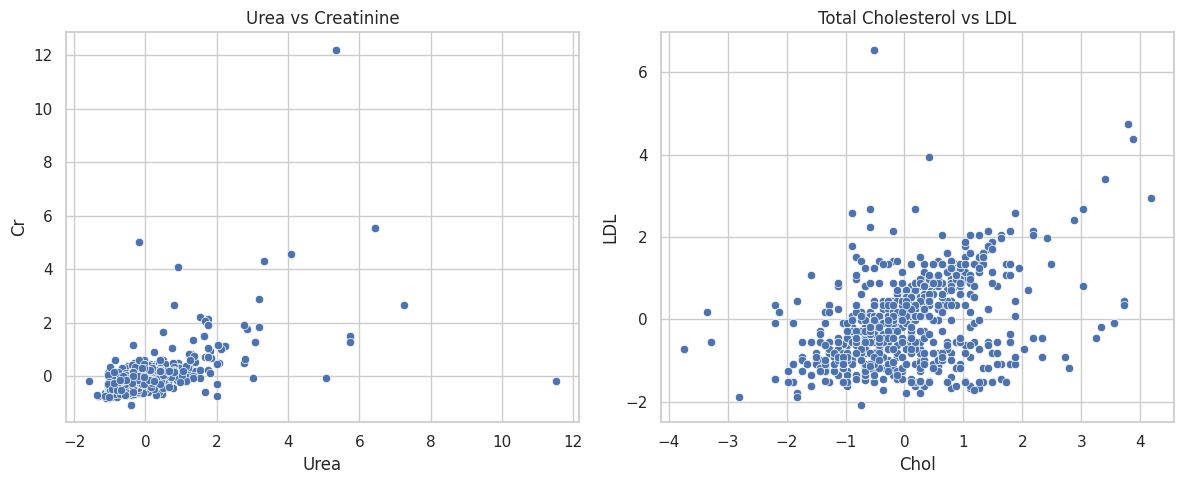

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=scaled_df, x="Urea", y="Cr", ax=axes[0])
axes[0].set_title("Urea vs Creatinine")

sns.scatterplot(data=scaled_df, x="Chol", y="LDL", ax=axes[1])
axes[1].set_title("Total Cholesterol vs LDL")

plt.tight_layout()
plt.show()


In [62]:
### VIF Calculation code 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = corr_df.drop(columns=["CLASS_Encoded"], errors="ignore")

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_df.sort_values("VIF", ascending=False)


,Feature,VIF
9,BMI,40.818804
0,AGE,40.371388
4,Chol,20.559309
3,HbA1c,15.990950
7,LDL,8.378233
1,Urea,6.664200
5,TG,4.716859
6,HDL,4.620044
2,Cr,3.885389
10,Gender_encoded,2.484363


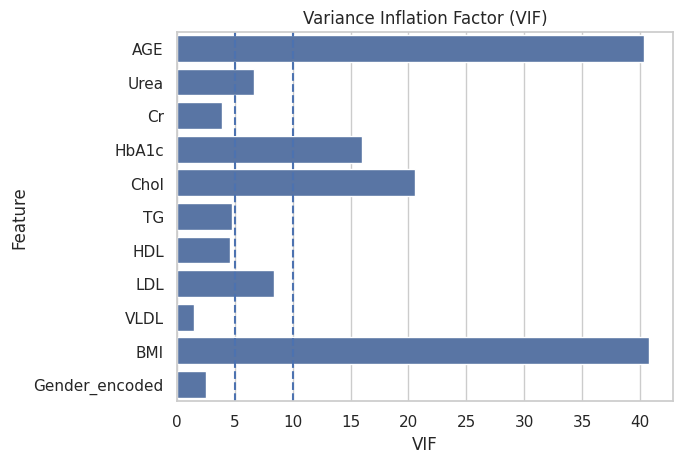

In [63]:
sns.barplot(data=vif_df, x="VIF", y="Feature")
plt.axvline(5, linestyle="--")
plt.axvline(10, linestyle="--")
plt.title("Variance Inflation Factor (VIF)")
plt.show()


### VIF Interpretation Guide

| VIF Value | Meaning  | Action       |
| --------- | -------- | ------------ |
| **< 5**   | Safe     | Keep         |
| **5–10**  | Moderate | Monitor      |
| **> 10**  | Severe   | Drop / merge |


### Classification Modelling

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline

In [65]:
log_features = [
    "AGE", "BMI", "HbA1c", "TG", "Chol"
]


In [66]:
rf_features = [
    "AGE", "BMI", "HbA1c", "TG", "Chol", "Urea", "Gender_encoded"
]


In [67]:
y = corr_df["CLASS_Encoded"]


In [68]:
X_log = corr_df[log_features]
X_rf  = corr_df[rf_features]

X_log_train, X_log_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, random_state=42, stratify=y
)

X_rf_train, X_rf_test, _, _ = train_test_split(
    X_rf, y, test_size=0.2, random_state=42, stratify=y
)


In [69]:
log_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

log_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    # "clf__penalty": ["l2"],
    # "clf__solver": ["lbfgs"]
}
log_grid_search = GridSearchCV(
    log_pipeline,
    log_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
log_grid_search.fit(X_log_train, y_train)

# Best parameters and scorebest_log_model = log_grid_search.best_estimator_
print("Best Logistic Parameters:", log_grid_search.best_params_)
best_log_model = log_grid_search.best_estimator_
y_log_pred = best_log_model.predict(X_log_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_log_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_log_pred))
print("Accuracy:", accuracy_score(y_test, y_log_pred))


Best Logistic Parameters: {'clf__C': 10}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.50      0.20      0.29        10
           2       0.95      0.98      0.97       169

    accuracy                           0.94       200
   macro avg       0.77      0.70      0.71       200
weighted avg       0.92      0.94      0.92       200

Confusion Matrix:
[[ 19   0   2]
 [  2   2   6]
 [  1   2 166]]
Accuracy: 0.935


In [70]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2]
}


rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

rf_grid.fit(X_rf_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_
y_rf_pred = best_rf_model.predict(X_rf_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy:", accuracy_score(y_test, y_rf_pred))



Best Random Forest Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
[[ 21   0   0]
 [  0   9   1]
 [  0   0 169]]
Accuracy: 0.995



Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.50      0.20      0.29        10
           2       0.95      0.98      0.97       169

    accuracy                           0.94       200
   macro avg       0.77      0.70      0.71       200
weighted avg       0.92      0.94      0.92       200



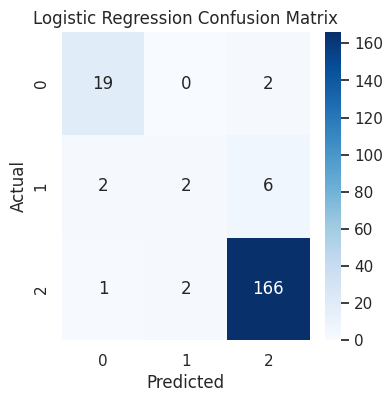


Random Forest Classifier Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



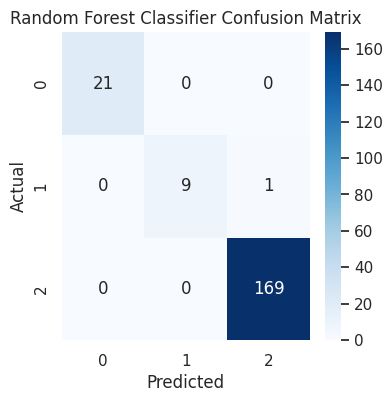

In [71]:
# Model Evaluation
def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    
    print(f"\n{title} Classification Report\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
evaluate_model(best_log_model, X_log_test, y_test, "Logistic Regression")
evaluate_model(best_rf_model, X_rf_test, y_test, "Random Forest Classifier")

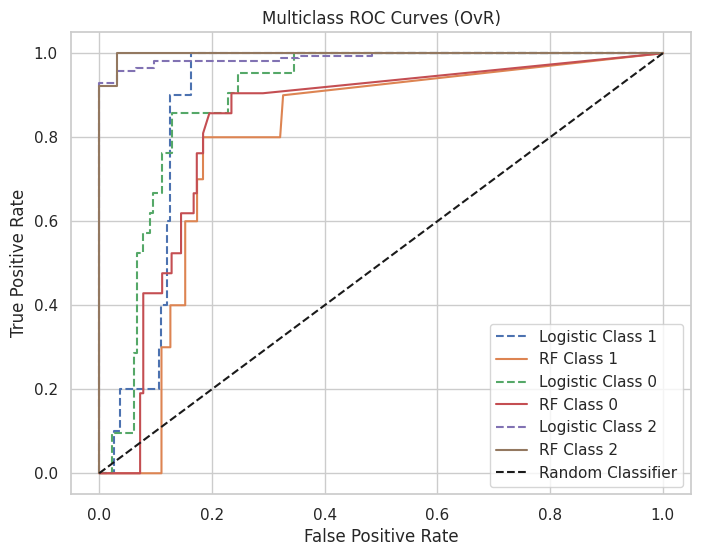

In [72]:
from sklearn.preprocessing import label_binarize

# Binarize the labels
classes = y_test.unique()
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities
y_log_prob = best_log_model.predict_proba(X_log_test)
y_rf_prob = best_rf_model.predict_proba(X_rf_test)

plt.figure(figsize=(8,6))

for i, class_label in enumerate(classes):
    fpr_log, tpr_log, _ = roc_curve(y_test_bin[:, i], y_log_prob[:, i])
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_rf_prob[:, i])
    
    plt.plot(fpr_log, tpr_log, linestyle='--', label=f"Logistic Class {class_label}")
    plt.plot(fpr_rf, tpr_rf, label=f"RF Class {class_label}")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves (OvR)")
plt.legend()
plt.show()


In [73]:
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=classes)

log_auc = roc_auc_score(y_test_bin, best_log_model.predict_proba(X_log_test), multi_class='ovr')
rf_auc  = roc_auc_score(y_test_bin, best_rf_model.predict_proba(X_rf_test), multi_class='ovr')

print(f"Logistic Regression AUC: {log_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")


Logistic Regression AUC: 0.926
Random Forest AUC: 0.871


In [74]:
import xgboost as xgb


In [75]:
xgb_features = rf_features

X_xgb = corr_df[xgb_features]


In [76]:
X_xgb_train, X_xgb_test, y_train, y_test = train_test_split(
    X_xgb, y, test_size=0.2, random_state=42, stratify=y
)


In [77]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    # use_label_encoder=False,
    random_state=42
)


In [78]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}


xgb_grid = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

xgb_grid.fit(X_xgb_train, y_train)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
best_xgb_model = xgb_grid.best_estimator_
y_xgb_pred = best_xgb_model.predict(X_xgb_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_xgb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_xgb_pred))
print("Accuracy:", accuracy_score(y_test, y_xgb_pred))  

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   9   1]
 [  0   0 169]]
Accuracy: 0.99



XGBoost Classification Report

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       169

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200



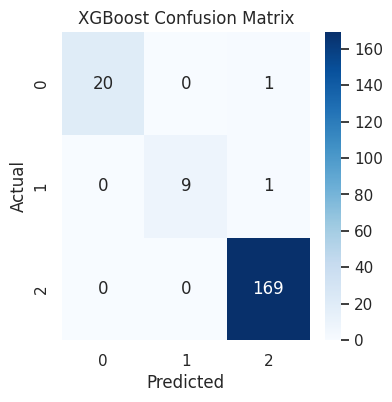

In [79]:
evaluate_model(best_xgb_model, X_xgb_test, y_test, "XGBoost")


### Clustering Analysis

In [80]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
# Use numerical features for clustering
cluster_features = [
    "AGE", "Urea", "Cr", "HbA1c", "Chol",
    "TG", "HDL", "LDL", "VLDL", "BMI"
]

X_cluster = df[cluster_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


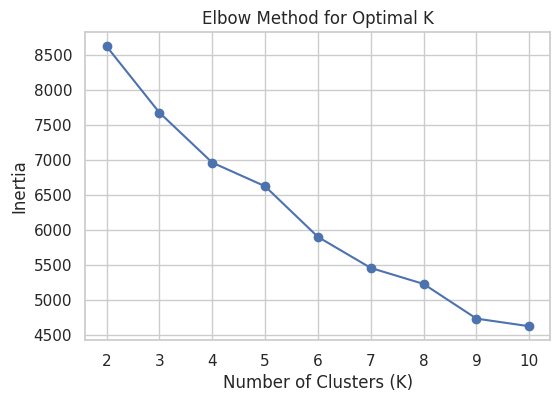

In [82]:
# K Means Clustering
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [83]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette score
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))


K-Means Silhouette Score: 0.1532358934887142


In [95]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette score
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))


K-Means Silhouette Score: 0.1970790148498258


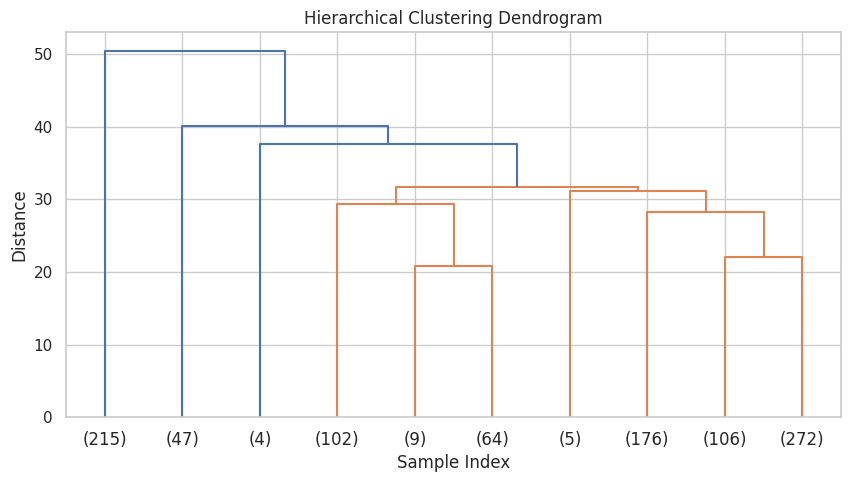

In [92]:
# Agglomerative Clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))

dendrogram(
    linked,
    truncate_mode='lastp',
    p=10,                     # truncation length
    orientation='top',
    distance_sort='ascending'
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [86]:
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo_labels))


Agglomerative Silhouette Score: 0.19440552438946282


In [87]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # adjust eps
dbscan_labels = dbscan.fit_predict(X_scaled)

# Handle noise points (-1)
mask = dbscan_labels != -1
if mask.any():
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled[mask], dbscan_labels[mask]))
else:
    print("DBSCAN: No core clusters found. Try adjusting eps/min_samples.")


DBSCAN Silhouette Score: 0.09218501285061145


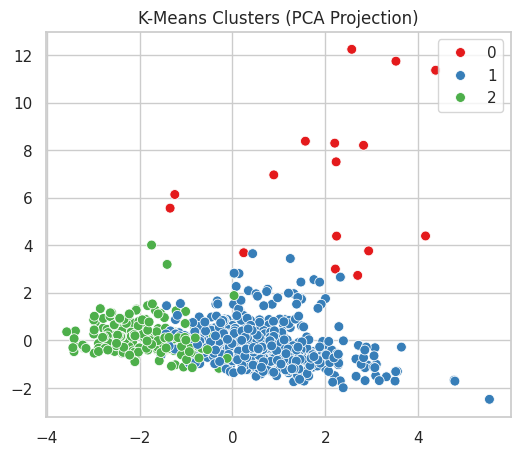

In [88]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1', s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.show()


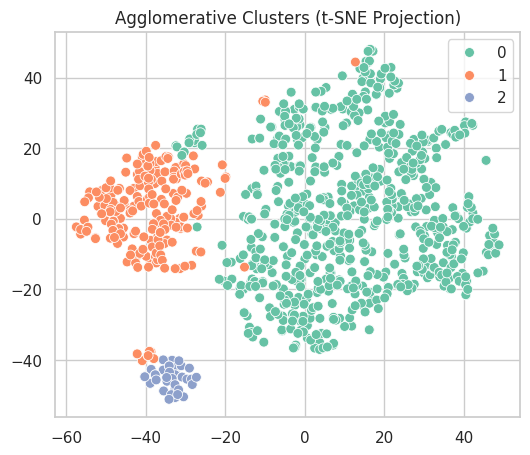

In [89]:
# T-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=agglo_labels, palette='Set2', s=50)
plt.title("Agglomerative Clusters (t-SNE Projection)")
plt.show()


In [90]:
# Compare Clustering Methods
cluster_results = pd.DataFrame({
    "KMeans": kmeans_labels,
    "Agglomerative": agglo_labels,
    "DBSCAN": dbscan_labels,
    "CLASS_Encoded": corr_df["CLASS_Encoded"]
})

print(cluster_results.head())


   KMeans  Agglomerative  DBSCAN  CLASS_Encoded
0       2              0       0              0
1       2              1       0              0
2       2              0       0              0
3       2              0       0              0
4       2              1       0              0


In [91]:
df_clustered = corr_df.copy()
df_clustered["KMeans_Cluster"] = kmeans_labels

cluster_summary = df_clustered.groupby("KMeans_Cluster")[cluster_features].mean()
print(cluster_summary)


                      AGE       Urea          Cr     HbA1c      Chol  \
KMeans_Cluster                                                         
0               54.444444  18.655556  404.277778  7.794444  4.777778   
1               56.994616   5.000865   63.010767  9.176797  4.904199   
2               42.682008   4.490795   62.129707  5.533473  4.740586   

                      TG       HDL       LDL      VLDL        BMI  
KMeans_Cluster                                                     
0               3.116667  1.227778  2.600000  1.277778  31.755556  
1               2.466904  1.200000  2.573943  2.028129  31.443849  
2               1.927197  1.217782  2.721967  1.358996  23.613556  
